<a href="https://colab.research.google.com/github/rakibhasan3948/DataMining-MachineLearning/blob/main/Classifying_Different_Types_of_Smoker_and_Drinker_by_Analyzing_Body_Signal_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load DataSet**

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/8th Semester/DataMining&MachineLearning/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


# **Preprocessing**

In [3]:
df.isna().sum( )

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
df.DRK_YN = le.fit_transform(df.DRK_YN)
df.sex = le.fit_transform(df.sex)

In [7]:
df.DRK_YN.unique()

array([1, 0])

In [8]:
df.DRK_YN.value_counts()

0    495858
1    495488
Name: DRK_YN, dtype: int64

In [9]:
df.SMK_stat_type_cd.unique()

array([1., 3., 2.])

In [10]:
df.SMK_stat_type_cd = df.SMK_stat_type_cd.astype(int)

In [11]:
df.SMK_stat_type_cd.unique()

array([1, 3, 2])

In [12]:
df.SMK_stat_type_cd.value_counts()

1    602441
3    213954
2    174951
Name: SMK_stat_type_cd, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])

<ipython-input-13-128d76b7958e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])


In [14]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,...,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,1,1
1,1.0,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,...,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,3,0
2,1.0,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,...,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,1,0
3,1.0,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,...,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,1,0
4,1.0,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,...,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,1,0


# **Principal Component Analysis**

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principal_components = pca.fit_transform(df.iloc[:,0:22])


# **Visualization**

<Axes: >

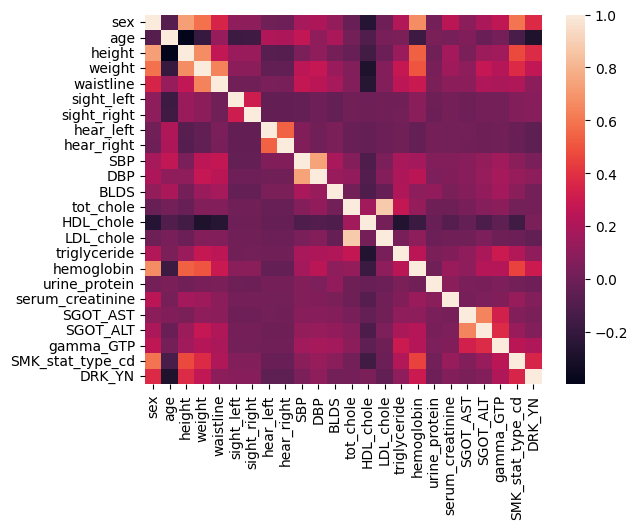

In [16]:
import seaborn as srn
srn.heatmap(df.iloc[::].corr())

# **Logistic Regression**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LogisticRegression

**SmokerType**

In [22]:
x = principal_components
y = df.SMK_stat_type_cd

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [24]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.668220103898724

**DrinkerType**

In [25]:
x = principal_components
y = df.DRK_YN

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [27]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7030614818177233

# **K Nearest Neighbors**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

**SmokerType**

In [29]:
x = principal_components
y = df.SMK_stat_type_cd

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [31]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6456801331517628

**DrinkerType**

In [32]:
x = principal_components
y = df.DRK_YN

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [34]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6590457457003076

# **Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

**SmokerType**

In [36]:
x = principal_components
y = df.SMK_stat_type_cd

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [38]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6584808594341051

**DrinkerType**

In [39]:
x = principal_components
y = df.DRK_YN

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [41]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6494981590760075

# **DecisionTree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

**SmokerType**

In [43]:
x = principal_components
y = df.SMK_stat_type_cd

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [45]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6124678468754728

**DrinkerType**

In [46]:
x = principal_components
y = df.DRK_YN

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [48]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.614555908609472

# **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

**SmokerType**

In [50]:
x = principal_components
y = df.SMK_stat_type_cd

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [52]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6669339789176376

**DrinkerType**

In [53]:
x = principal_components
y = df.DRK_YN

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [55]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6900035305391637